In [3]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [4]:
# Read in data from health records survey as a raw table
# Public data from the UC Michigan Institute for Social Research
# Health and Retirement Survey - rsonline.isr.umich.edu
#
hrec06 = Table.read_table("./hrsextract06.csv")
hrec06

hhidpn,r8agey_m,ragender,raracem,rahispan,raedyrs,h8cpl,h8atota,rayshlt,r8shlt,r8expyrs,r8cesd,r8bpavgs,r8bpavgp,r8smoken,r8mdactx,r8weightbio,r8weight,r8heightbio,r8height
3010,70,1,1,0,12,1,914000,3,3,21.5,0,140,58,0,4,74.1623,71.6672,1.64465,1.6256
3020,67,2,1,0,16,1,914000,1,3,23.7,0,139,72,0,1,66.9048,65.317,1.61925,1.6256
10003030,50,2,1,0,16,0,12000,3,5,47.5,4,124,98,0,2,64.4101,58.9667,1.5494,1.5748
10004010,66,1,1,0,16,1,1.832e+06,1,4,7,1,130,74,0,2,101.605,102.511,1.8415,1.8542
10004040,60,2,1,0,12,1,1.832e+06,1,2,28.25,0,125,67,0,2,77.3374,77.1103,1.6383,1.651
10013010,68,1,1,0,12,0,50,1,3,16.5,2,125,67,0,5,110.223,108.862,1.7272,1.7272
10038010,70,1,1,0,16,1,2.5e+06,2,2,22.5,1,107,52,0,2,73.4819,74.8423,1.70815,1.7526
10038040,63,2,1,0,16,1,2.5e+06,1,1,27.05,1,112,70,0,2,65.3173,64.4098,1.67005,1.6764
10050010,64,2,3,0,17,0,664066,1,2,27.025,1,136,90,0,5,75.9767,68.0385,1.5875,1.6256
10059020,70,2,1,0,16,1,1.2405e+07,2,3,19.5,0,112,54,1,2,58.967,57.6059,1.6637,1.6764


In [5]:
health_map = Table(["raw label", "label", "encoding", "Description"]).with_rows(
       [["hhidpn",  "id", None, "identifier"],
        ["r8agey_m", "age", None, "age in years in wave 8"],
        ["ragender", "gender", ['male','female'], "1 = male,  2 = female)"],
        ["raracem",  "race",   ['white','black','other'], "(1 = white,  2 = black,  3 = other)"],
        ["rahispan", "hispanic",  None, "(1 = yes)"],
        ["raedyrs",  "education", None, "education in years"],
        ["h8cpl",    "couple",    None, "in a couple household (1 = yes)"],
        ["r8bpavgs", "blood pressure", None,"average systolic BP"],
        ["r8bpavgp", "pulse", None, "average pulse"],
        ["r8smoken", "smoker",None, "currently smokes cigarettes"],
        ["r8mdactx", "exercise", None, "frequency of moderate exercise (1=everyday, 2=>1perweek, 3=1perweek, 4=1-3permonth\
, 5=never)"],
        ["r8weightbio", "weight", None, "objective weight in kg"],
        ["r8heightbio","height", None, "objective height in m"]])
health_map

raw label,label,encoding,Description
hhidpn,id,None,identifier
r8agey_m,age,None,age in years in wave 8
ragender,gender,"['male', 'female']","1 = male, 2 = female)"
raracem,race,"['white', 'black', 'other']","(1 = white, 2 = black, 3 = other)"
rahispan,hispanic,None,(1 = yes)
raedyrs,education,None,education in years
h8cpl,couple,None,in a couple household (1 = yes)
r8bpavgs,blood pressure,None,average systolic BP
r8bpavgp,pulse,None,average pulse
r8smoken,smoker,None,currently smokes cigarettes


In [6]:
def table_lookup(table,key_col,key,map_col):
    row = np.where(table[key_col]==key)
    if len(row[0]) == 1:
        return table[map_col][row[0]][0]
    else:
        return -1

In [7]:
def map_raw_table(raw_table,map_table):
    mapped = Table()
    for raw_label in raw_table :
        if raw_label in map_table["raw label"] :
            new_label = table_lookup(map_table,'raw label',raw_label,'label')
            encoding = table_lookup(map_table,'raw label',raw_label,'encoding')
            if encoding is None :
                mapped[new_label] = raw_table[raw_label]
            else:
                mapped[new_label] = raw_table.apply(lambda x: encoding[x-1], raw_label)
    return mapped

In [8]:
# create a more usable table by mapping the raw to finished
health = map_raw_table(hrec06,health_map)
health

id,age,gender,race,hispanic,education,couple,blood pressure,pulse,smoker,exercise,weight,height
3010,70,male,white,0,12,1,140,58,0,4,74.1623,1.64465
3020,67,female,white,0,16,1,139,72,0,1,66.9048,1.61925
10003030,50,female,white,0,16,0,124,98,0,2,64.4101,1.5494
10004010,66,male,white,0,16,1,130,74,0,2,101.605,1.8415
10004040,60,female,white,0,12,1,125,67,0,2,77.3374,1.6383
10013010,68,male,white,0,12,0,125,67,0,5,110.223,1.7272
10038010,70,male,white,0,16,1,107,52,0,2,73.4819,1.70815
10038040,63,female,white,0,16,1,112,70,0,2,65.3173,1.67005
10050010,64,female,other,0,17,0,136,90,0,5,75.9767,1.5875
10059020,70,female,white,0,16,1,112,54,1,2,58.967,1.6637


In [9]:
def firstQtile(x) : return np.percentile(x,25)
def thirdQtile(x) : return np.percentile(x,25)
summary_ops = (min, firstQtile, np.median, np.mean, thirdQtile, max, sum)

In [10]:
# Let's try what is the effect of smoking
smokers = health.where('smoker',1)
nosmokers = health.where('smoker',0)
print(smokers.num_rows, ' smokers')
print(nosmokers.num_rows, ' non-smokers')

893  smokers
5449  non-smokers


In [11]:
smokers.stats(summary_ops)

statistic,id,age,gender,race,hispanic,education,couple,blood pressure,pulse,smoker,exercise,weight,height
min,1.0059e+07,30,female,black,0,0,0,68,45,1,1,36.0606,1.4224
firstQtile,4.8508e+07,55,,,0,11,0,114,66,1,2,64.1833,1.6002
median,1.15627e+08,62,,,0,12,1,129,74,1,3,75.2963,1.67005
mean,1.98972e+08,62.0728,,,0.0615901,12.1299,0.62598,130.354,74.5801,1,2.98768,76.7292,1.67348
thirdQtile,4.8508e+07,55,,,0,11,0,114,66,1,2,64.1833,1.6002
max,5.02753e+08,87,male,white,1,17,1,217,119,1,5,134.263,1.9685
sum,1.77682e+11,55431,,,55,10832,559,116406,66600,893,2668,68519.2,1494.42


In [12]:
nosmokers.stats(summary_ops)

statistic,id,age,gender,race,hispanic,education,couple,blood pressure,pulse,smoker,exercise,weight,height
min,3010,31,female,black,0,0,0,79,34,0,1,32.205,1.36525
firstQtile,4.5397e+07,60,,,0,12,0,117,62,0,2,68.0388,1.5875
median,1.10427e+08,68,,,0,12,1,129,69,0,2,79.6054,1.65735
mean,1.65713e+08,67.4986,,,0.073408,12.9648,0.715728,130.934,69.4542,0,2.69114,81.2584,1.66315
thirdQtile,4.5397e+07,60,,,0,12,0,117,62,0,2,68.0388,1.5875
max,5.02759e+08,90,male,white,1,17,1,224,133,0,5,137.892,1.96215
sum,9.02972e+11,367800,,,400,70645,3900,713462,378456,0,14664,442777,9062.52


In [13]:
np.mean(nosmokers['weight'])-np.mean(smokers['weight'])

4.5292127574925019

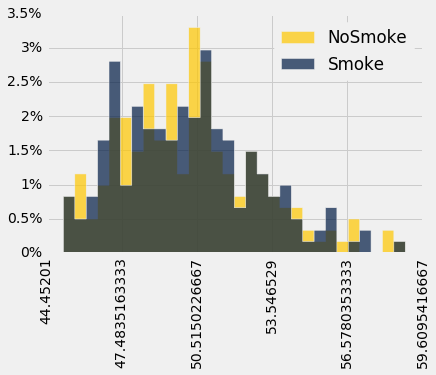

In [14]:
# Lets draw two samples of equal size
n_sample = 200
smoker_sample = smokers.sample(n_sample)
nosmoker_sample = nosmokers.sample(n_sample)
weight = Table().with_columns([('NoSmoke', nosmoker_sample['weight']),('Smoke', smoker_sample['weight'])])
weight.hist(overlay=True,bins=30,normed=True)

In [15]:
weight.stats(summary_ops)

statistic,NoSmoke,Smoke
min,45.1324,44.452
firstQtile,64.0699,63.5029
median,76.9972,76.2035
mean,77.7377,77.5631
thirdQtile,64.0699,63.5029
max,135.397,134.263
sum,15547.5,15512.6


Is the difference observed between these samples representative of the larger population?

In [16]:
combined = Table().with_column('all', np.append(nosmoker_sample['weight'],smoker_sample['weight']))

In [17]:
# permutation test, split the combined into two random groups, do the comparison of those
def getdiff():
    A,B = combined.split(300)
    return (np.mean(A['all'])-np.mean(B['all']))

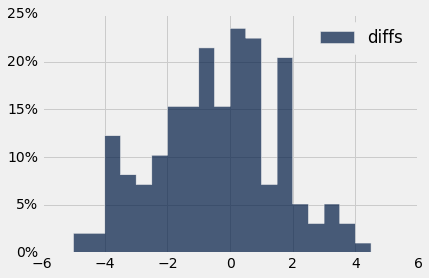

In [18]:
# Do the permutation many times and form the distribution of results
num_samples = 200
diff_samples = Table().with_column('diffs', [getdiff() for i in range(num_samples)])
diff_samples.hist(bins=np.arange(-5,5,0.5), normed=True)

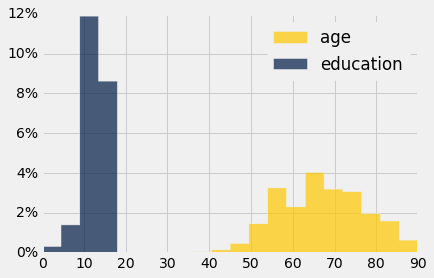

In [19]:
# A sense of the overall population represented - older
health.select(['age','education']).hist(bins=20)

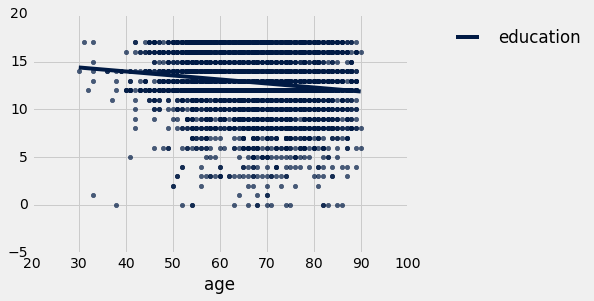

In [20]:
# How does education correlate with age?
health.select(['age','education']).scatter('age', fit_line=True)

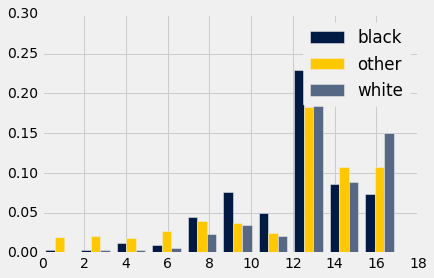

In [21]:
health.pivot_hist('race','education',normed=True)

In [22]:
# How are races represented in the dataset and how does hispanic overlay the three?
race = health.select(['race', 'hispanic'])   
race['count']=1
by_race = race.group('race',sum)
by_race['race frac'] = by_race['count sum']/np.sum(by_race['count sum'])
by_race['hisp frac'] = by_race['hispanic sum'] / by_race['count sum']
by_race

race,hispanic sum,count sum,race frac,hisp frac
black,10,766,0.120782,0.0130548
other,148,279,0.0439924,0.530466
white,297,5297,0.835225,0.0560695


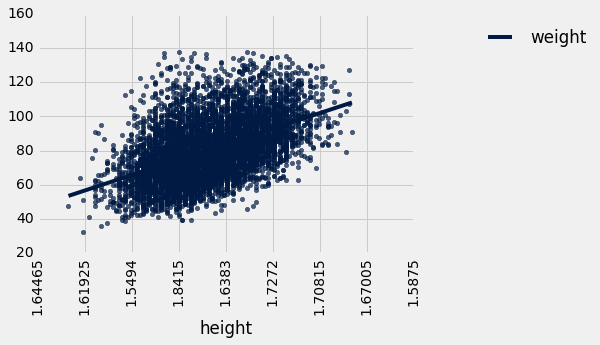

In [23]:
health.select(['height','weight']).scatter('height','weight',fit_line=True)